# Intro to PyTorch

**Computer Vision**, A. A. 2020/2021

 

Written by Matteo Dunnhofer

Machine Learning and Perception Lab

University of Udine

In this notebook we will see an interactive tutorial about the features of the [PyTorch framework](https://pytorch.org) for ML. 

In particular, we will see some basic data structures and functions to manipulate tensors, and some modules that are used to define and train deep neural networks.


## PyTorch Basics

PyTorch is a Python-based scientific computing package targeted at two sets of audiences:
*   a replacement for NumPy to use the power of GPUs
*   a deep learning research platform that provides maximum flexibility and speed

Let's see some basic function and commands...

### Tensors

The base data structure in PyTorch is [`torch.Tensor`](https://pytorch.org/docs/stable/tensors.html)

In [ ]:
import torch

Construct a 5x3 matrix, uninitialized:

In [ ]:
x = torch.empty(5, 3)
print(x)

Construct a randomly initialized matrix:

In [ ]:
x = torch.rand(5, 3)
print(x)

Construct a matrix filled zeros and of dtype long:

In [ ]:
x = torch.zeros(5, 3, dtype=torch.long)
print(x)

Construct a tensor directly from data:

In [ ]:
x = torch.tensor([[5.5, 3, 2],
                  [3.14, 2.71, 0]])
print(x)

Get and print some sizes:

In [ ]:
print(x.size(), x.size(1))
print(x.shape, x.shape[1])

Note: ``torch.Size`` is in fact a tuple, so it supports all tuple operations.

### Operations on Tensors

PyTorch offers a large number of operations to manipulate tensors and you can have a look at them [here](https://pytorch.org/docs/stable/torch.html).

In the following, we will see how addition can be implemented and some other operations that are used in everyday PyTorch code.



There can be multiple syntaxes for operations. In the following example, we will take a look at the addition operation

In [ ]:
x = torch.ones(5, 3)
y = torch.rand(5, 3)
z = x + y

print(x)
print(y)
print(z)

In [ ]:
z = torch.add(x, y)

print(z)

In [ ]:
torch.add(x, y, out=z)

print(z)

In [ ]:
y.add_(x) # in-place addition

print(y)

Note: Any operation that mutates a tensor in-place is post-fixed with an ``_``. For example: ``x.copy_(y)``, ``x.t_()``, will change ``x``.

You can use standard NumPy-like indexing with all bells and whistles!

In [ ]:
print(x[:, 1])
print(y[1:3,:])
print(z[0:2,1:3])

If you want to resize/reshape tensors, you can use torch.view:

In [ ]:
x = torch.randn(4, 4)
y = x.view(16)
z = x.view(-1, 8)  # the size -1 is inferred from other dimensions
print(x.size(), y.size(), z.size())

If you have a one element tensor, use .item() to get the value as a Python number

In [ ]:
x = torch.randn(1)
print(x)
print(x.item())

### NumPy Bridge

Converting a Torch Tensor to a NumPy array and vice versa is a breeze.
The Torch Tensor and NumPy array will share their underlying memory locations, and changing one will change the other.

Converting a Torch Tensor to a NumPy Array

In [ ]:
a = torch.ones(5)
print(a)

In [ ]:
b = a.numpy()
print(b)

See how the numpy array changed in value.

In [ ]:
a.add_(1)

print(a)
print(b)

Converting NumPy Array to Torch Tensor

See how changing the `np` array changed the `torch` Tensor automatically.

In [ ]:
import numpy as np

a = np.ones(5)
b = torch.from_numpy(a)
np.add(a, 1, out=a)

print(a)
print(b)

Note: all the Tensors on the CPU except a `CharTensor` support converting to NumPy and back.

### CUDA Tensors

Tensors can be initialized directly on any device, or moved onto by the .to method.

In [ ]:
# let us run this cell only if CUDA is available
# We will use ``torch.device`` objects to move tensors in and out of GPU
if torch.cuda.is_available():
    device = torch.device("cuda")          # a CUDA device object

    y = torch.ones_like(x, device=device)  # directly create a tensor on GPU
    x = x.to(device)                       # or just use strings ``.to("cuda")``
    z = x + y

    print(z)
    print(z.to("cpu", torch.double))       # ``.to`` can also change dtype together!

Beware of where tensor live when you perform operations on them!

In [ ]:
x = torch.ones(5, 3)
y = torch.randn(5, 3)

if torch.cuda.is_available():
    device = torch.device("cuda") 
    y = y.to(device)

#z = x + y

## torchvision

The [`torchvision`](https://pytorch.org/vision/stable/index.html) package consists of popular datasets, model architectures, and common image transformations for computer vision.

Let's see some basics.

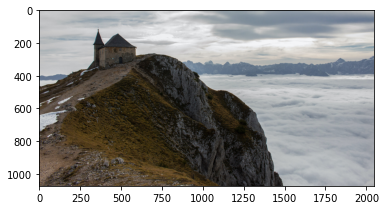

In [ ]:
from PIL import Image
from matplotlib.pyplot import imshow

image = Image.open('dobratsch.jpg')

imshow(image)

Let's adjust the contrast.

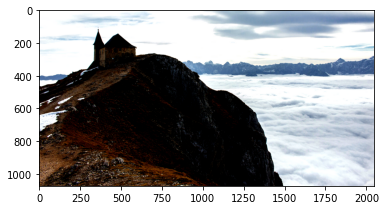

In [ ]:
import torchvision.transforms.functional as TF

image_tf = TF.adjust_contrast(image, contrast_factor=2)

imshow(image_tf)

Let's perform some affine transformations.

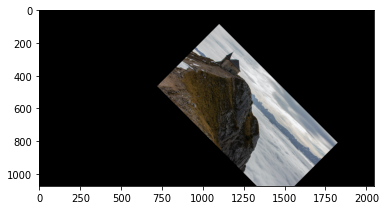

In [ ]:
image_tf = TF.affine(image, angle=45, translate=[250,100], scale=0.5, shear=0)

imshow(image_tf)

Let's crop a part of the image.

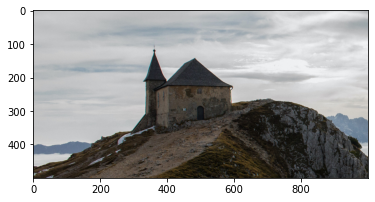

In [ ]:
image_tf = TF.crop(image, top=0, left=0, height=500, width=1000)

imshow(image_tf)

Let's convert a PIL image to a PyTorch tensor.

In [ ]:
image_tensor = TF.to_tensor(image)

print(image_tensor)
print(image_tensor.size())

tensor([[[0.7294, 0.7373, 0.7451,  ..., 0.7843, 0.7765, 0.7725],
         [0.7412, 0.7373, 0.7373,  ..., 0.7725, 0.7725, 0.7686],
         [0.7451, 0.7412, 0.7373,  ..., 0.7686, 0.7725, 0.7725],
         ...,
         [0.4353, 0.4275, 0.4392,  ..., 0.6706, 0.6667, 0.6627],
         [0.3490, 0.4706, 0.5255,  ..., 0.6706, 0.6745, 0.6706],
         [0.3686, 0.5216, 0.5412,  ..., 0.6745, 0.6745, 0.6706]],

        [[0.7333, 0.7412, 0.7490,  ..., 0.7843, 0.7765, 0.7725],
         [0.7451, 0.7412, 0.7412,  ..., 0.7725, 0.7725, 0.7686],
         [0.7490, 0.7451, 0.7412,  ..., 0.7686, 0.7725, 0.7725],
         ...,
         [0.3412, 0.3412, 0.3569,  ..., 0.6745, 0.6706, 0.6667],
         [0.2824, 0.3725, 0.4235,  ..., 0.6745, 0.6784, 0.6745],
         [0.2980, 0.4275, 0.4431,  ..., 0.6784, 0.6784, 0.6745]],

        [[0.7412, 0.7490, 0.7569,  ..., 0.7843, 0.7765, 0.7725],
         [0.7529, 0.7490, 0.7490,  ..., 0.7725, 0.7725, 0.7686],
         [0.7569, 0.7529, 0.7490,  ..., 0.7686, 0.7725, 0.

For more complex tasks, [Kornia](https://kornia.github.io) is a Python package written in PyTorch that offers many image processing and computer vision routines.

## Autograd: Automatic Differentiation

Central to all neural networks in PyTorch is the [autograd package](https://pytorch.org/docs/stable/autograd.html). This package provides automatic differentiation for all operations on Tensors. It is a define-by-run framework, which means that your backprop is defined by how your code is run, and that every single iteration can be different.

Let us see this in more simple terms with some examples.

As we said earlier, torch.Tensor is the central class of the package. By setting its attribute .requires_grad as True, it starts to track all operations on it. When you finish your computation you can call .backward() and have all the gradients computed automatically. The gradient for this tensor will be accumulated into .grad attribute.

Let's create a tensor and set requires_grad=True to track computation with it.

In [ ]:
x = torch.ones(2, 2, requires_grad=True)

print(x)

Do an operation of tensor:

In [ ]:
y = x + 2

print(y)

y was created as a result of an operation, so it has a grad_fn.

In [ ]:
print(y.grad_fn)

Do more operations on y

In [ ]:
z = y * y * 3
out = z.mean()

print(z, out)

Let's backprop now!

In [ ]:
out.backward()

and print gradients d(out)/dx

In [ ]:
print(x.grad)

You should have got a matrix of ``4.5``. Let’s call the ``out``
*Tensor* “$o$”.

We have that $o = \frac{1}{4}\sum_i z_i$,
$z_i = 3(x_i+2)^2$ and $z_i\bigr\rvert_{x_i=1} = 27$.

Therefore,
$\frac{\partial o}{\partial x_i} = \frac{3}{2}(x_i+2)$, hence
$\frac{\partial o}{\partial x_i}\bigr\rvert_{x_i=1} = \frac{9}{2} = 4.5$.


You can also stop autograd from tracking history on Tensors with `.requires_grad=True` by calling the `.detach()` method or by wrapping the code block in with `torch.no_grad():`



In [ ]:
print(x.requires_grad)
print((x ** 2).requires_grad)

print((x ** 2).detach().requires_grad)

with torch.no_grad():
	print((x ** 2).requires_grad)

## Neural Networks in PyTorch

PyTorch provides the elegantly designed modules and classes [`torch.nn`](https://pytorch.org/docs/stable/nn.html) to help you define neural network architectures in an easy way. 

There are several way to build models in PyTorch, at different levels of detail. We will see the most used conventions.

### A simple Multi-Layer Perceptron

Let's start by seeing how we can implement and run a simple neural network.

Suppose that we want to solve a regression task with a multi-layer perceptron, where our data is composed by 5 samples with 256 features and we want to estimate 3 dependent variables.  


Let's first code the multi-layer perceptron architecture. 

We do this by defining a subclass of `nn.Module` (which itself is a class and able to keep track of state) that holds our weights, bias, and method for the forward step.

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class MLP(nn.Module):

    def __init__(self):
        super().__init__()

        n_input = 256
        n_neurons = 128
        n_output = 3

        self.hidden = nn.Linear(n_input, n_neurons)
        self.output = nn.Linear(n_neurons, n_output)

    def forward(self, x):
        x = F.relu(self.hidden(x))
        x = self.output(x)

        return x

Note:

The `forward` method implements the forward pass of your model and runs `Tensor` operations in the given order. This method must be always defined.

The `backward` method (which computes the gradients during the backward pass) can be overridden if you want to define your own gradient rules. In the usual case, the definition provided by `torch.autograd` is employed.

Now instanciate the model.

In [ ]:
model = MLP()

You can pretty print the model architecture simply by

In [ ]:
print(model)

You can access the learnable parameters via

In [ ]:
params = list(model.parameters())

print(params)
print(params[0].size(), params[1].size())

Now let's feed forward the model on our (random) data.

In [ ]:
x = torch.randn(5, 256)
y = torch.randn(5, 3)

out = model(x)

print(out.size())

Let's see how we can compute the gradients of the model.

We have to first define a loss function and then compute its derivative. Luckily, `nn.functional` (you can also finde them in `nn.Module`) gives us some off-the-shelf functions to measure errors. 

As we said, `model` implements a regressor so we can use the Mean Squared Error as cost function.

In [ ]:
loss = F.mse_loss(out, y)

print(loss)

Now let's compute the gradients.

In [ ]:
model.zero_grad()
print(params[1].grad)

loss.backward()
print(params[1].grad)

### A full training step of a ConvNet

Let's dive in a more complex example by implementing a full training step for a convolutional neural network (CNN).

In this case, suppose we want to our network to classify some images among 5 classes.

Let's first define the CNN.

In [ ]:
class ConvNet(nn.Module):

    def __init__(self):
        super().__init__()

        n_input_channels = 3
        n_output = 5

        self.conv = nn.Sequential(
            nn.Conv2d(n_input_channels, 64, kernel_size=3, stride=1),
            nn.ReLU(),
            nn.Conv2d(64, 64, kernel_size=3, stride=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=1)
        )

        self.fc = nn.Sequential(
            nn.Linear(64 * 59 * 59, 128),
            nn.ReLU(),
            nn.Linear(128, n_output)
        )

    def forward(self, x):
        x = self.conv(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x

Now let's create some (random) images with the respective class labels.

Convolutional operations `nn.Conv2d` expect tensor to have `(B, C, H, W)` sizes, where `B` stands for the batch size, `C` the number of channels of the images, `H` and `W` the height and width respectively.

In [ ]:
x = torch.randint(0, 255, size=(4, 3, 64, 64)).float() 
y = torch.randint(0, 5, size=(4, 1)).squeeze(-1)

Let's create the model...

In [ ]:
model = ConvNet()

... but let's perform the forward pass on the GPU this time!

In [ ]:
model = model.to(device)

x = x.to(device)
y = y.to(device)

out = model(x)

print(out)


Now we should perform the backward pass.

As first, we need to compute the loss between the targets and model's predicitons. As we are tackling a classification problem, we can use the [Cross Entropy](https://en.wikipedia.org/wiki/Cross_entropy).

In [ ]:
loss = F.cross_entropy(out, y)
print(loss)

Let's then compute the gradients.

In [ ]:
model.zero_grad()
loss.backward()

And now we are ready to perform an actual update of the parameters of the model, i.e. change their values according to the gradients.

For doing this, we can use different algorithm that implement different update rules. The easiest option is to use the [Stochastic Gradient Descent](https://en.wikipedia.org/wiki/Stochastic_gradient_descent) optimization algorithm. In `torch.optim` you can find many other optimizers.

Let's define it.

In [ ]:
optim = torch.optim.SGD(model.parameters(), lr=0.1)

And now let's finally update the parameters!

In [ ]:
conv1_weight = list(model.conv.modules())[1].bias
print(conv1_weight)

optim.step()

print(conv1_weight)

And that's it! You have implemnted a full training step of a deep neural network!

Some useful reminders:

*   `nn.Module`: creates a callable which behaves like a function, but can also contain state(such as neural net layer weights). It knows what Parameter (s) it contains and can zero all their gradients, loop through them for weight updates, etc.
*   `nn.Parameter`: a wrapper for a tensor that tells a Module that it has weights that need updating during backprop. Only tensors with the requires_grad attribute set are updated
*   `nn.functional`: a module (usually imported into the `F` namespace by convention) which contains activation functions, loss functions, etc, as well as non-stateful versions of layers such as convolutional and linear layers.
